In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../analysisTools/")
import plotTools as ptools
import utils


In [2]:
#coffea output file
f_bkg = "../coffea/unskimmed/WJets_2022.coffea"

#Nested Dictionary:
bkg_histo = util.load(f_bkg) [0]

In [3]:
bkg_histo

{'sel_e1_pt': Hist(
   StrCategory(['bkg_2022_WJets'], growth=True, name='samp', label='Sample Name'),
   StrCategory(['cut1', 'cut2'], growth=True, name='cut', label='Cut Applied'),
   Regular(50, 0, 50, name='pt'),
   storage=Weight()) # Sum: WeightedSum(value=9.31853, variance=0.123388) (WeightedSum(value=9.39768, variance=0.124432) with flow),
 'sel_e1_eta': Hist(
   StrCategory(['bkg_2022_WJets'], growth=True, name='samp', label='Sample Name'),
   StrCategory(['cut1', 'cut2'], growth=True, name='cut', label='Cut Applied'),
   Regular(100, -2.5, 2.5, name='eta'),
   storage=Weight()) # Sum: WeightedSum(value=9.39768, variance=0.124432),
 'sel_e1_phi': Hist(
   StrCategory(['bkg_2022_WJets'], growth=True, name='samp', label='Sample Name'),
   StrCategory(['cut1', 'cut2'], growth=True, name='cut', label='Cut Applied'),
   Regular(64, -3.2, 3.2, name='phi'),
   storage=Weight()) # Sum: WeightedSum(value=9.39768, variance=0.124432),
 'sel_e1_dxy': Hist(
   StrCategory(['bkg_2022_WJets'

In [4]:
bkg_histo['PFMET'] 

Hist(
  StrCategory(['bkg_2022_WJets'], growth=True, name='samp', label='Sample Name'),
  StrCategory(['cut1', 'cut2'], growth=True, name='cut', label='Cut Applied'),
  Regular(100, 50, 300, name='met'),
  storage=Weight()) # Sum: WeightedSum(value=3.99751, variance=0.0529302) (WeightedSum(value=9.39768, variance=0.124432) with flow)

In [5]:
#Description of the cuts
cuts = list(bkg_histo["cutDesc"].keys())   #The cuts
print ("Cuts:",cuts)   

Cuts: ['all', 'hasVtx', 'cut1', 'cut2', 'cut4', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10']


/uscms/home/reshmar/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots//WJets_sel_vtx_vxy100.png


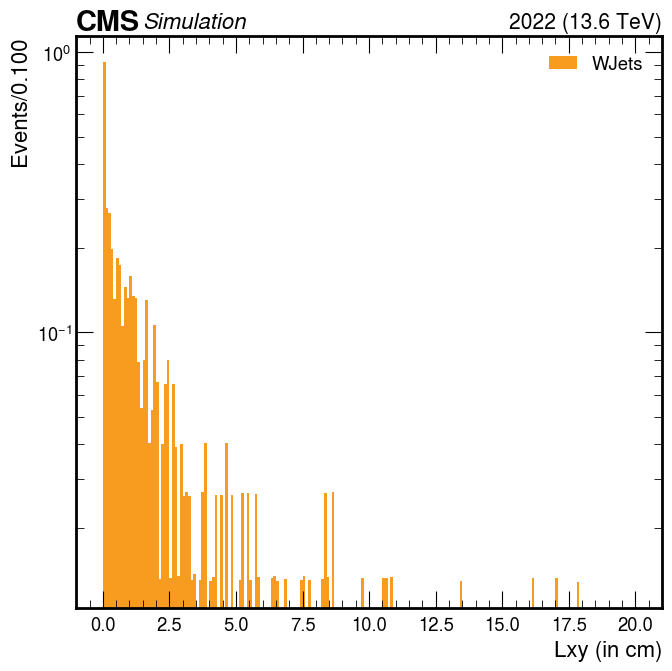

In [6]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy100',
    'cut': 'cut2',
    'year': 2022
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': r"Lxy (in cm)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'WJets_sel_vtx_vxy100.png'
}

# bkg
ptools.plot_bkg_1d(bkg_histo, plot_dict, style_dict, isLegacy = False)


#plt.title('')
plt.legend()
plt.show()

Saved: ./plots//WJets_minJetMETdPhi.png


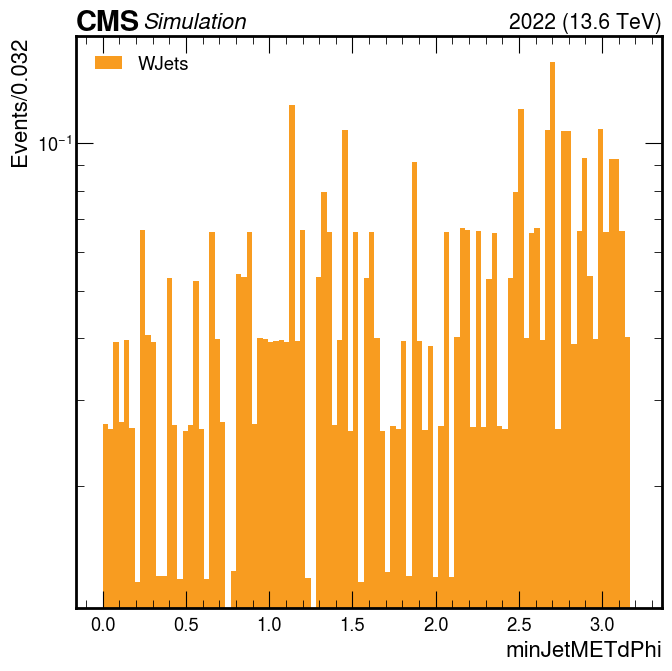

In [10]:
#Top left plot
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'minJetMETdPhi',
    'cut': 'cut2',
    'year': 2022
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': r"minJetMETdPhi",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'WJets_minJetMETdPhi.png'
}

# bkg
ptools.plot_bkg_1d(bkg_histo, plot_dict, style_dict, isLegacy = False)


#plt.title('')
plt.legend()
plt.show()

Saved: ./plots//WJets_M.png


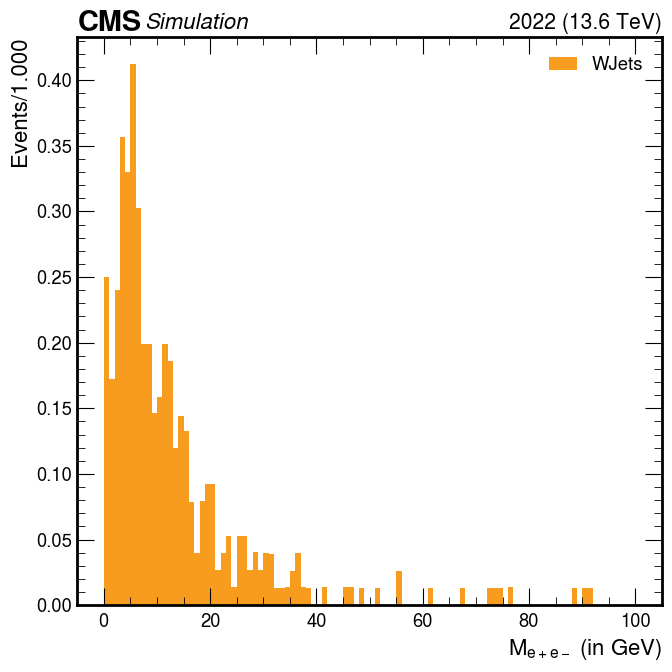

In [8]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut2',
    'year': 2022
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim':[0,100] ,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': r"$M_{e+e-}$ (in GeV)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'WJets_M.png'
}

# bkg
ptools.plot_bkg_1d(bkg_histo, plot_dict, style_dict, isLegacy = False)


#plt.title('')
plt.legend()
plt.show()

Saved: ./plots//WJets_Refit_M.png


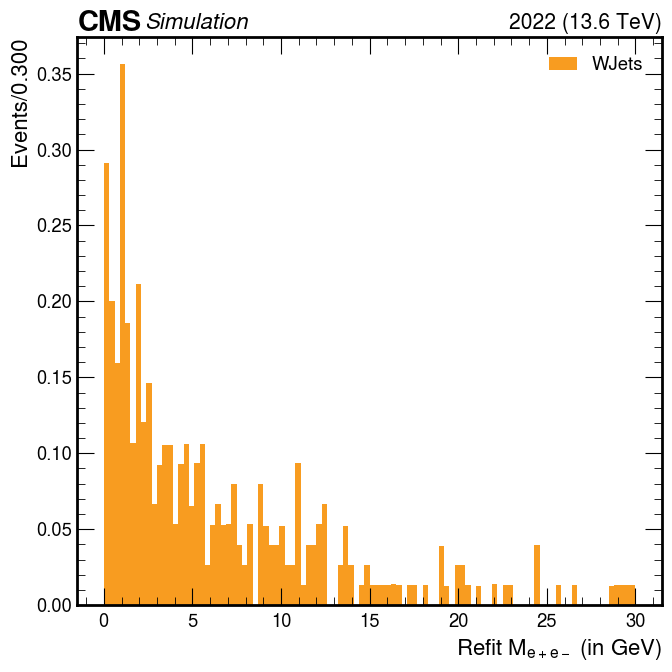

In [9]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_refit',
    'cut': 'cut2',
    'year': 2022
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim':None ,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': r"Refit $M_{e+e-}$ (in GeV)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'WJets_Refit_M.png'
}

# bkg
ptools.plot_bkg_1d(bkg_histo, plot_dict, style_dict, isLegacy = False)


#plt.title('')
plt.legend()
plt.show()